In [7]:
from textblob import TextBlob
import tweepy
import re
import jsonpickle
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import gensim
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [2]:
amazon=pd.read_csv('C:/Users/Administrator/Desktop/Term 3/Unstructured Data/datasets/amazon_reviews_big.csv')
amazon.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000HDJXNA,1,What I recieved is not what is pictured here O...,"12 26, 2012",A29YXBFTD7QUP3,HHA,Buyer be ware,1.356480e+09
1,B006KKS7XQ,5,Excellent unit and a pretty simple install usi...,"09 20, 2013",A3IMTXFYD7CGDN,"Peter W. George ""soyflakeman""",high quality without high price,1.379635e+09
2,B002NP8XJ0,5,"I'm enjoying this keyboard, I'm getting anothe...","08 31, 2010",AXNOW20FQKHVW,B. Hayashi,Superb keyboard + solution for slow wake up an...,1.283213e+09
3,B000EITTLE,4,"Overall, this is a fantastic camera that I'm e...","02 3, 2008",A10KCAK279LO0W,"mmcwatters ""macdadi80""",One qualm: not great in low light,1.201997e+09
4,B006CRXK4S,5,These work very well with mySamsung PN64D7000 ...,"01 28, 2012",A19XXLMZXR764J,S. Garfinkle,"Work great, fit well",1.327709e+09


In [8]:
docs=amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]','')

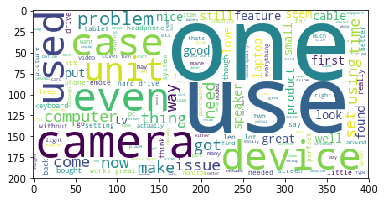

In [5]:
from wordcloud import WordCloud
wc=WordCloud(background_color='white').generate(docs)
plt.imshow(wc)

In [10]:
import nltk
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
stopwords=nltk.corpus.stopwords.words('english')
def clean_sentence(text):
    words=text.split(' ')
    words_clean=[stemmer.stem(word) for word in words if word not in stopwords]
    words_clean=[word for word in words_clean if word not in stopwords]
    return ' '.join(words_clean)

In [11]:
docs_clean=[]
docs_clean=docs.apply(clean_sentence)

In [20]:
sentiment=SentimentIntensityAnalyzer()
def get_sentiment(text):
    score=sentiment.polarity_scores(text)['compound']
    return score

In [28]:
amazon['amazon_senti']=amazon['reviewText'].apply(get_sentiment)
amazon.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,amazon_senti
0,B000HDJXNA,1,What I recieved is not what is pictured here O...,"12 26, 2012",A29YXBFTD7QUP3,HHA,Buyer be ware,1.356480e+09,0.8449
1,B006KKS7XQ,5,Excellent unit and a pretty simple install usi...,"09 20, 2013",A3IMTXFYD7CGDN,"Peter W. George ""soyflakeman""",high quality without high price,1.379635e+09,0.9307
2,B002NP8XJ0,5,"I'm enjoying this keyboard, I'm getting anothe...","08 31, 2010",AXNOW20FQKHVW,B. Hayashi,Superb keyboard + solution for slow wake up an...,1.283213e+09,0.9921
3,B000EITTLE,4,"Overall, this is a fantastic camera that I'm e...","02 3, 2008",A10KCAK279LO0W,"mmcwatters ""macdadi80""",One qualm: not great in low light,1.201997e+09,0.5047
4,B006CRXK4S,5,These work very well with mySamsung PN64D7000 ...,"01 28, 2012",A19XXLMZXR764J,S. Garfinkle,"Work great, fit well",1.327709e+09,0.9359


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([ 2372.,  2984.,  3065.,  3273.,  5199.,  3371.,  5786.,  9077.,
        16874., 47999.]),
 array([-9.990e-01, -7.991e-01, -5.992e-01, -3.993e-01, -1.994e-01,
         5.000e-04,  2.004e-01,  4.003e-01,  6.002e-01,  8.001e-01,
         1.000e+00]),
 <a list of 10 Patch objects>)

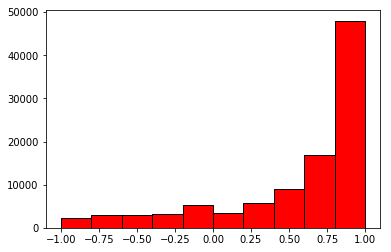

In [37]:
plt.hist(amazon.amazon_senti,edgecolor='black',color='red')

In [38]:
import gensim

In [39]:
docs=amazon['reviewText'].str.lower().str.replace('[^a-z ]','')

In [53]:
docs_clean=[]
stopwords=nltk.corpus.stopwords.words('english')
stemmer=nltk.stem.PorterStemmer()
stopwords.extend(['','use'])
for doc in docs:
    words=doc.split(' ')
    words_clean=[stemmer.stem(word) for word in words if word not in stopwords]
    docs_clean.append(words_clean)

In [54]:
dictionary=gensim.corpora.Dictionary(docs_clean)

In [55]:
list(zip(dictionary.keys(),dictionary.values()))[0:10]

[(0, 'advert'),
 (1, 'amazoncom'),
 (2, 'anyth'),
 (3, 'attempt'),
 (4, 'back'),
 (5, 'bait'),
 (6, 'buy'),
 (7, 'cabl'),
 (8, 'cheap'),
 (9, 'claim')]

In [56]:
docs_bow=[]
for doc in docs_clean:
    bow=dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [57]:
lda_model=gensim.models.LdaModel(docs_bow,id2word=dictionary,num_topics=9)

In [59]:
for bow in docs_bow:
    topicprobs=pd.DataFrame(lda_model.get_document_topics(bow),columns=['topic_no','probs'])

In [63]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model,docs_bow,dictionary)

C:\Users\Administrator\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [64]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.033372 -0.096660       1        1  20.016785
4     -0.068598  0.010800       2        1  15.461169
8     -0.079547  0.028335       3        1  14.481290
7     -0.087384  0.034241       4        1  11.773859
3     -0.044703  0.131837       5        1  11.586729
1     -0.050101  0.057543       6        1  10.376823
6     -0.056379 -0.066552       7        1   8.728506
2      0.105648 -0.187203       8        1   4.741318
5      0.314434  0.087659       9        1   2.833524, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
213   Default  29568.000000      camera  29568.000000  30.0000  30.0000
790   Default  21645.000000       drive  21645.000000  29.0000  29.0000
557   Default  15843.000000        card  15843.000000  28.0000  28.0000
95    Default  25628.000000       sound  25628.000000  27.0000  27.0000
127   Default  25552.000000        case  25552.000000  26.0000  26.0000
47    Default  16702.000000          tv  16702.000000  25.0000  25.0000
7     Default  24411.000000        cabl  24411.000000  24.0000  24.0000
380   Default  20688.000000     batteri  20688.000000  23.0000  23.0000
488   Default  13230.000000         len  13230.000000  22.0000  22.0000
436   Default  13984.000000     speaker  13984.000000  21.0000  21.0000
915   Default  16897.000000         usb  16897.000000  20.0000  20.0000
463   Default   7416.000000       mount   7416.000000  19.0000  19.0000
243   Default  12305.000000       charg  12305.000000  18.0000  18.0000
799   Default   9291.000000    headphon   9291.000000  17.0000  17.0000
541   Default   9570.000000        ipad   9570.000000  16.0000  16.0000
671   Default   8396.000000       remot   8396.000000  15.0000  15.0000
550   Default   7317.000000          gb   7317.000000  14.0000  14.0000
72    Default  13197.000000      instal  13197.000000  13.0000  13.0000
251   Default   9780.000000        hard   9780.000000  12.0000  12.0000
334   Default  17478.000000     connect  17478.000000  11.0000  11.0000
871   Default   8634.000000       cover   8634.000000  10.0000  10.0000
66    Default  15437.000000         fit  15437.000000   9.0000   9.0000
295   Default   4566.000000         fan   4566.000000   8.0000   8.0000
569   Default   7502.000000     protect   7502.000000   7.0000   7.0000
584   Default   8263.000000        mous   8263.000000   6.0000   6.0000
131   Default  15099.000000      comput  15099.000000   5.0000   5.0000
34    Default  23382.000000     qualiti  23382.000000   4.0000   4.0000
1014  Default   5599.000000        file   5599.000000   3.0000   3.0000
281   Default   8170.000000       music   8170.000000   2.0000   2.0000
1359  Default   4894.000000      memori   4894.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
1848   Topic9    318.282837        bolt    351.518646   3.4643  -6.2515
2019   Topic9   1069.693359           c   1400.905640   3.2939  -5.0393
2213   Topic9    467.753113        sdhc    547.056274   3.4070  -5.8665
3268   Topic9    395.301025  temperatur    458.440125   3.4155  -6.0348
3843   Topic9    467.376678     tighten    565.361877   3.3733  -5.8673
2902   Topic9    705.386536        chip    989.299683   3.2254  -5.4557
1484   Topic9   1365.107422        slot   2423.163818   2.9898  -4.7955
32     Topic9    719.476379       plate   1045.072998   3.1903  -5.4359
2649   Topic9    867.092163       class   1393.195190   3.0894  -5.2493
303    Topic9    723.836914         pin   1096.664429   3.1482  -5.4299
2652   Topic9    683.460632        core   1026.724243   3.1567  -5.4873
2449   Topic9   1550.163940        cool   3435.668945   2.7678  -4.6683
355    Topic9    679.325684        heat   1075.555786   3.1042  -5.4933
731    Topic9    868.071472         ram   1953.4902